### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,8]

In [2]:
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV

**Attribute information:**

   Given is the attribute name, attribute type, the measurement unit and a
   brief description.  The number of rings is the value to predict: either
   as a continuous value.
   
	Name		Data Type	Meas.	Description
	----		---------	-----	-----------
	Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in years

Reference: https://archive.ics.uci.edu/dataset/1/abalone

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
df = pd.read_csv(url, header=None)

In [4]:
df.head(2)

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


In [5]:
df.columns = [ "Sex", "Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight", "Rings"]

In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
df.shape

(4177, 9)

- There are 4177 rows and 9 columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### Statistical Analysis

In [9]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Distribution of the Variables

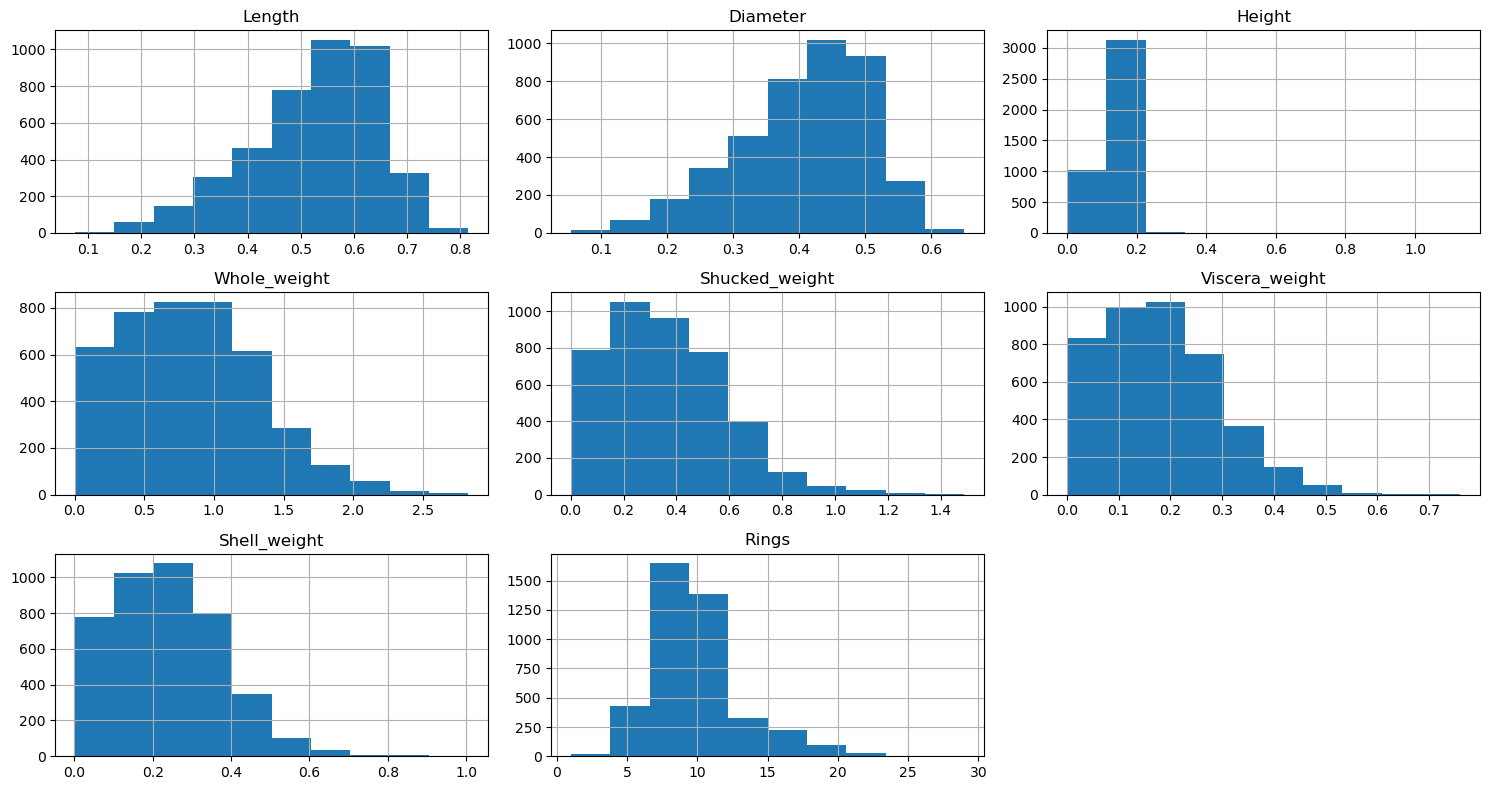

In [10]:
df.hist()
plt.tight_layout()

In [11]:
# Most of the variables are right skewed.

In [12]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole_weight      0.530959
Shucked_weight    0.719098
Viscera_weight    0.591852
Shell_weight      0.620927
Rings             1.114102
dtype: float64

### Checking Missing Values

In [13]:
# No missing values in the dataset.
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

### Checking Datatypes

In [14]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole_weight      float64
Shucked_weight    float64
Viscera_weight    float64
Shell_weight      float64
Rings               int64
dtype: object

In [15]:
#All the datatypes are assigned correctly.

### Outliers

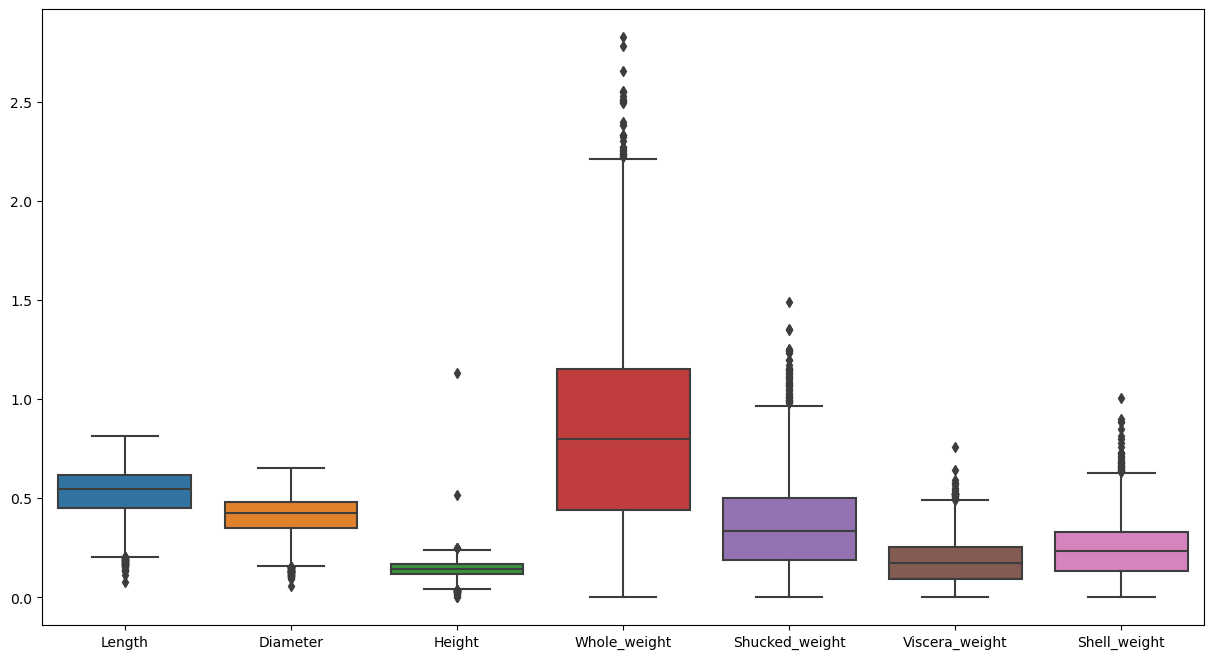

In [16]:
sns.boxplot(df.drop('Rings', axis = 1));

In [17]:
# There are few outliers in the data as well.

### Correlation

In [18]:
df.corr()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


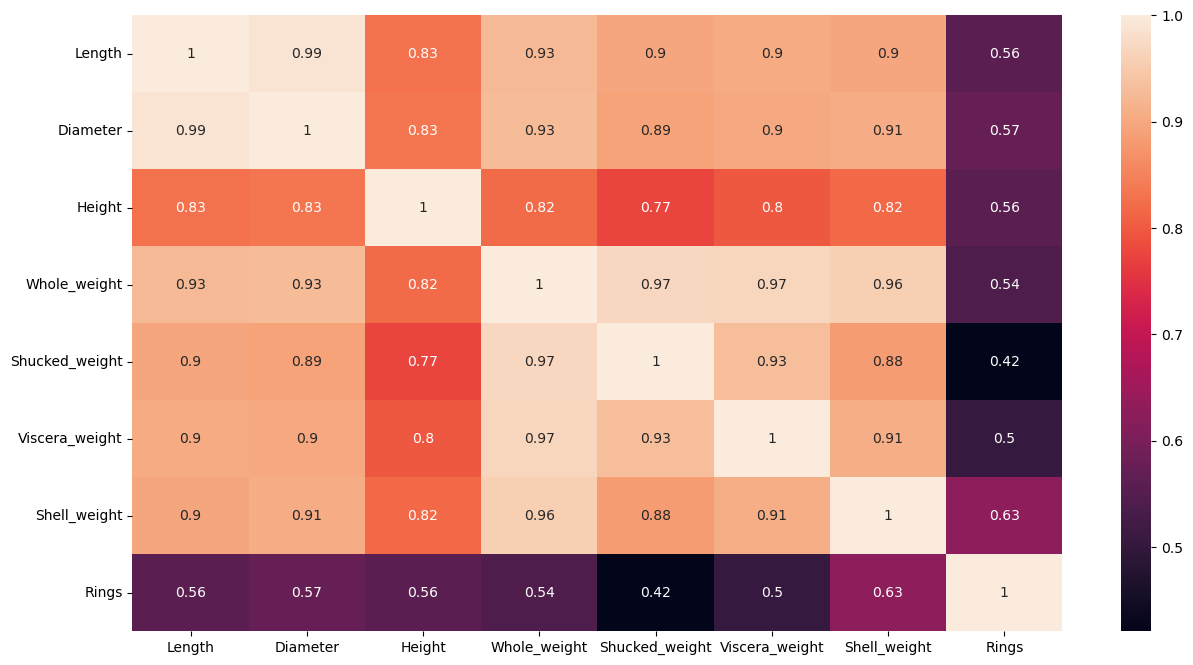

In [19]:
sns.heatmap(df.corr(), annot = True);

- Highly correlated among themselves. - High Multicollinearity.
- There is a moderate correlation with the target variable with all the independent features.

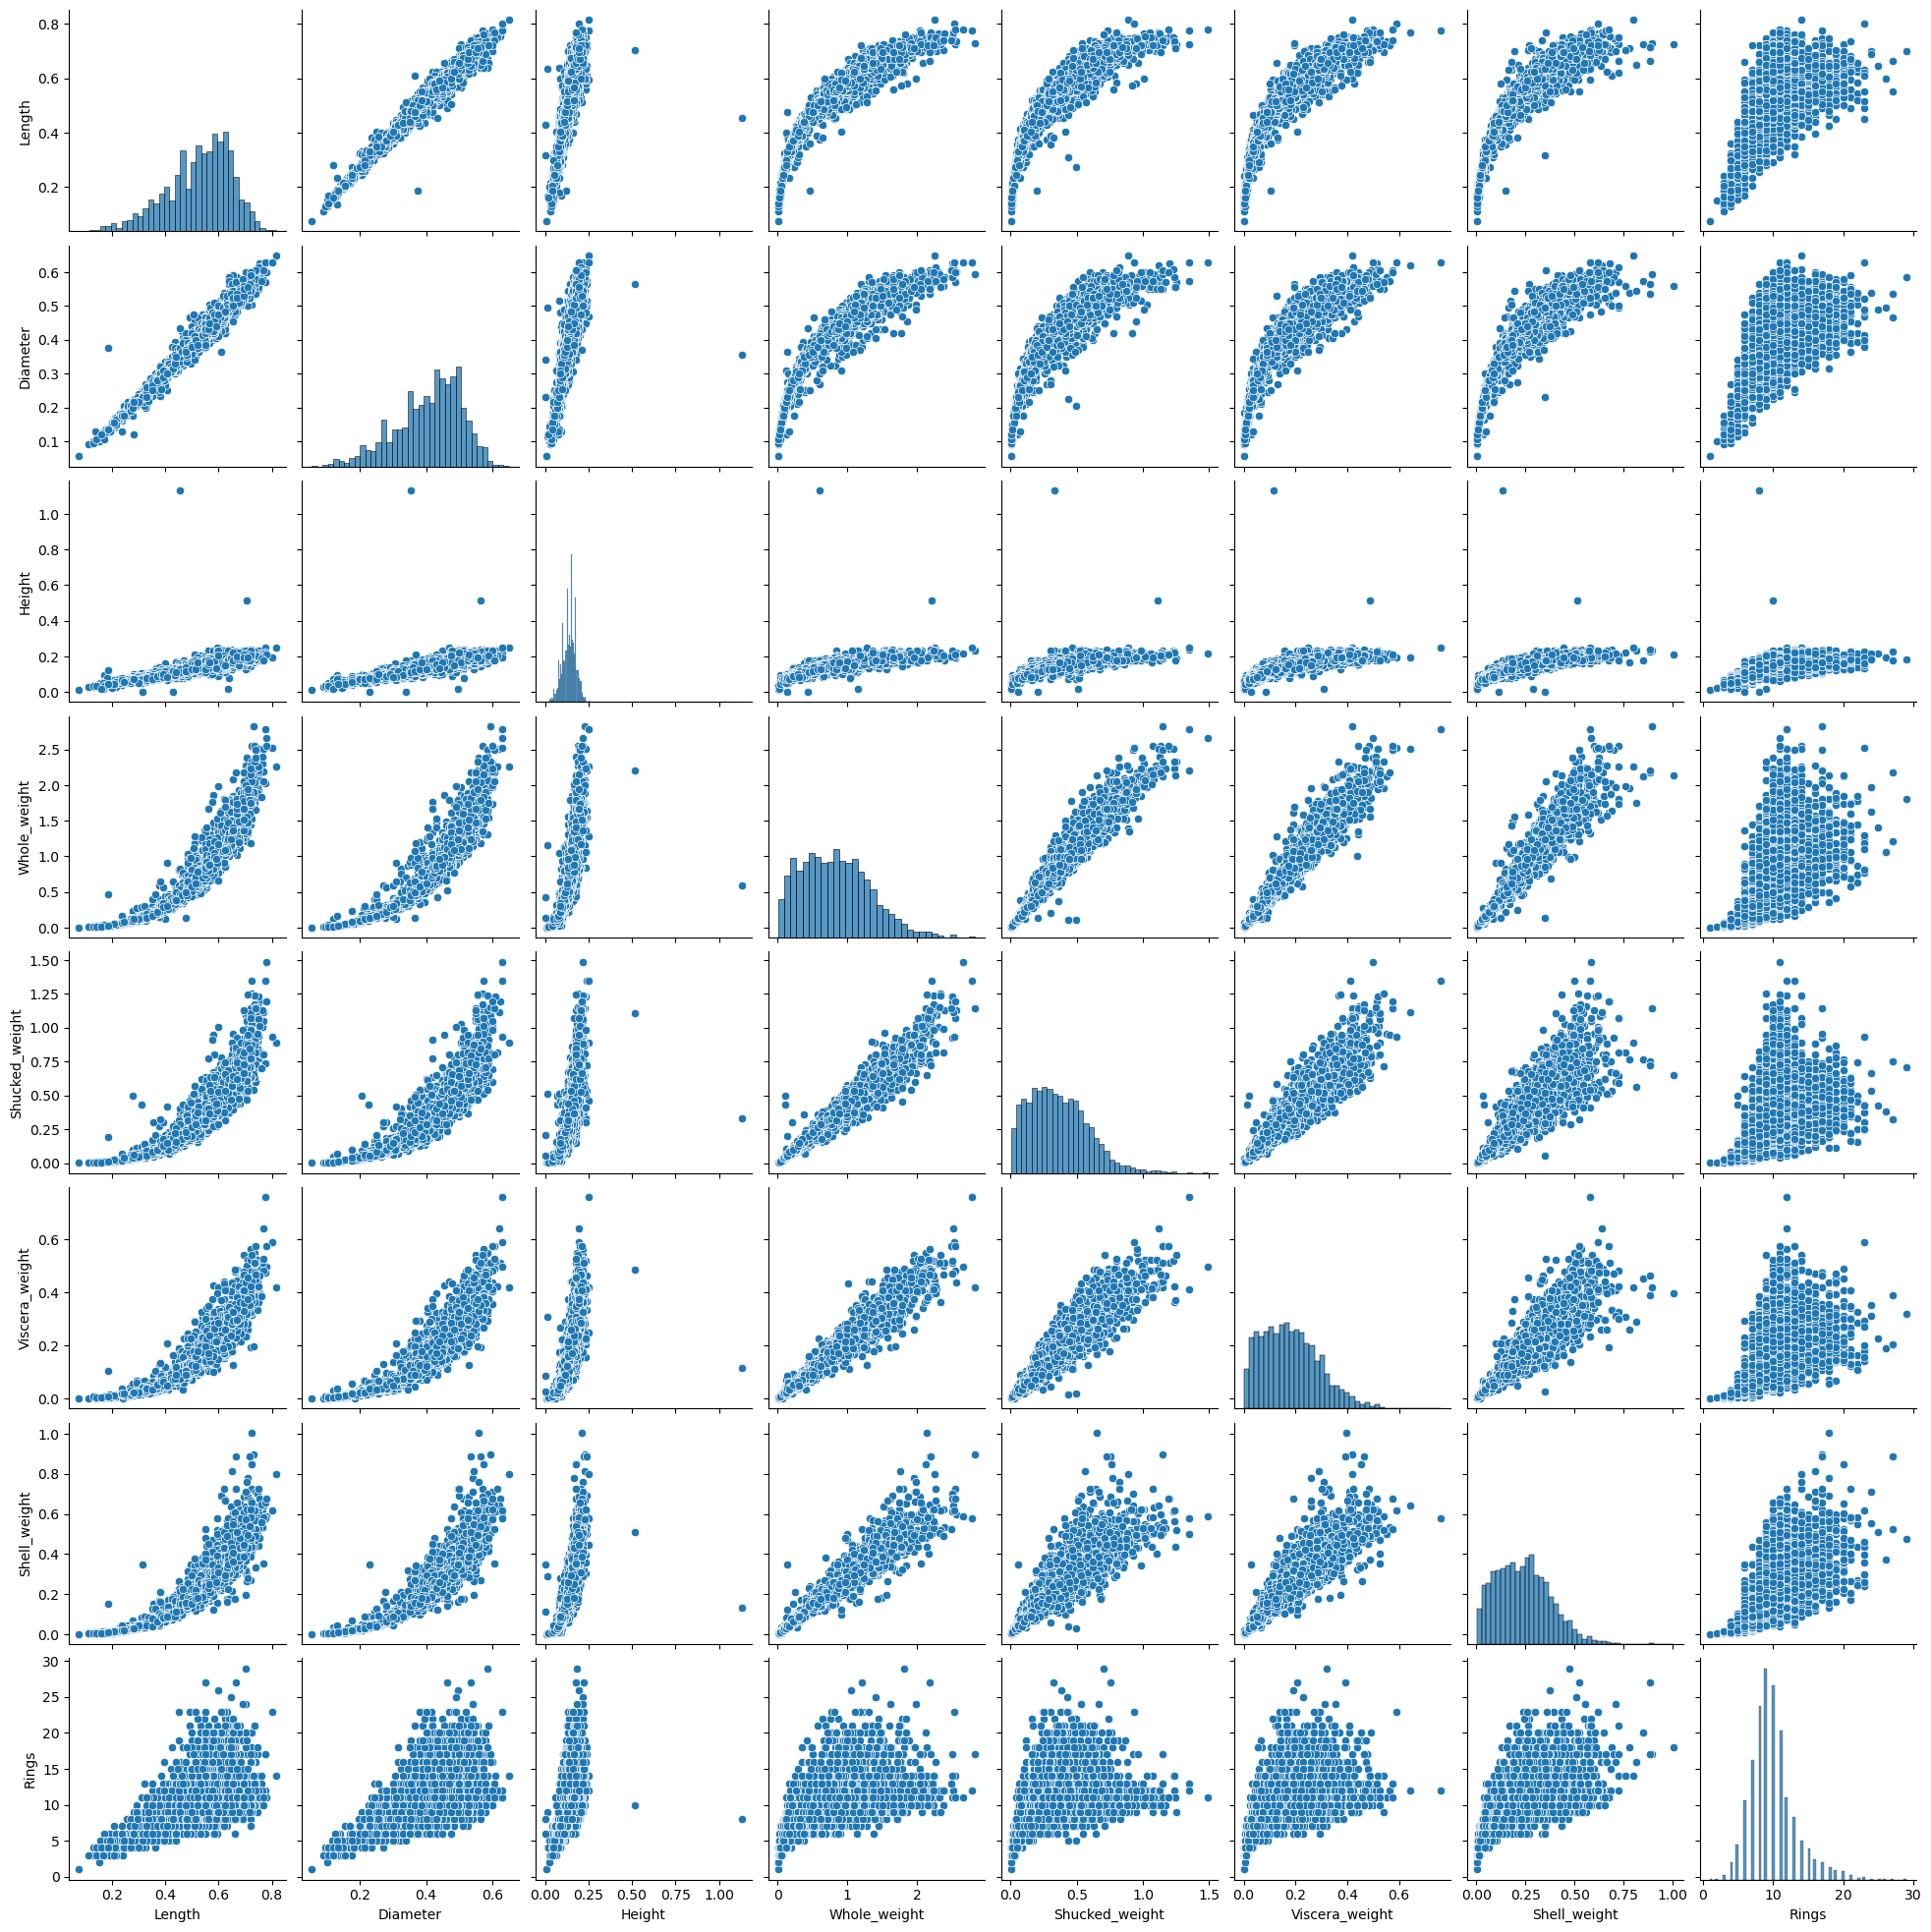

In [20]:
sns.pairplot(df)

- Even with the pairplot, we can observe the same. There is Multicollinearity in the data.

### Model Building

- All preprocessing steps are done. Now lets build a KNN Regressor(since target variable is continuous). Lets drop the categorical feature and build the model and analyze the results.

In [21]:
# Lets begin by scaling the input variables. Lets drop the Sex column.

In [22]:
df = df.drop('Sex', axis =1)

In [23]:
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [24]:
df_target = df['Rings']
df_features = df.drop('Rings', axis = 1)

In [25]:
df_features.head(2)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07


In [26]:
#Lets use the StandardScaler to scale the input variables.

X_std = StandardScaler()

scaled_val = X_std.fit_transform(df_features)

X = pd.DataFrame(scaled_val, columns = df_features.columns)

X.head(2)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987


In [27]:
y = df[['Rings']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (3132, 7)
y_train (3132, 1)
X_test (1045, 7)
y_test (1045, 1)


### KNNRegressor

In [30]:
# Lets start with n_neighbors = 7 and eventually check for which n the model is best performing.
knn = KNeighborsRegressor(n_neighbors=7)

knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [31]:
y_pred = knn.predict(X_test)
y_pred[:5]

array([[11.        ],
       [ 8.        ],
       [15.42857143],
       [10.71428571],
       [12.85714286]])

In [32]:
y_test.head()

,Rings
866,9
1483,8
599,16
1702,9
670,14


In [33]:
# We can see there is a misclassification in the data. The first datapoint is 11 but predicted as 11, in the same way for the other variables.

In [34]:
mse_train = mean_squared_error(y_train, knn.predict(X_train))
mse_test = mean_squared_error(y_test, knn.predict(X_test))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")

RMSE on the training data: 1.970031486330214

RMSE on the test data: 2.2889288741844056


In [35]:
# Here we can see a little bit of overfitting in the data.

### RMSE

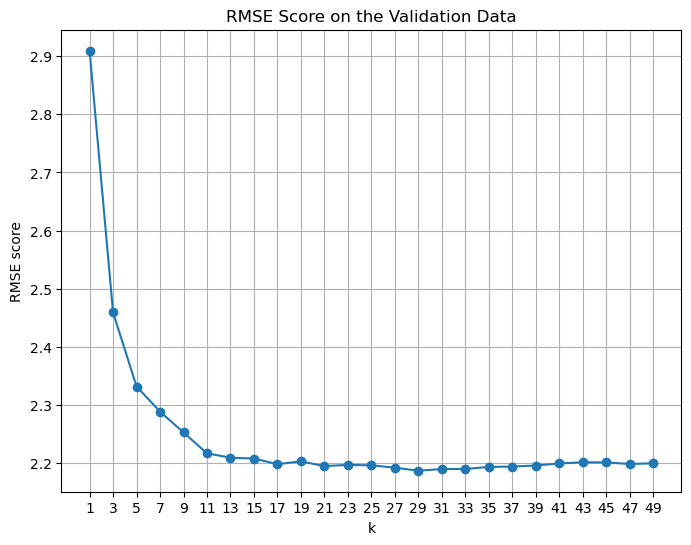

In [36]:
k_values = []
mse = []

for k in range(1, 50, 2):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))
    k_values.append(k)


plt.figure(figsize = (8, 6))

plt.plot(k_values, np.sqrt(mse), marker = "o")
plt.title("RMSE Score on the Validation Data")
plt.xlabel("k")
plt.ylabel("RMSE score")
plt.xticks(k_values)
plt.grid();

### MAE

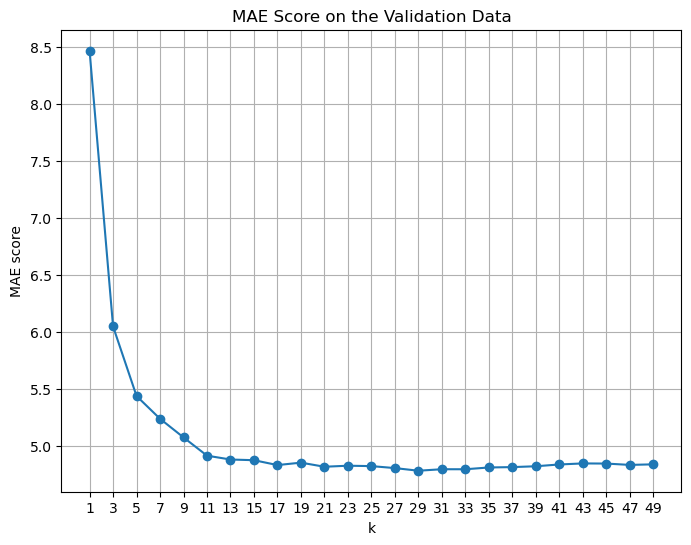

In [37]:
k_values = []
mae = []

for k in range(1, 50, 2):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, y_pred))
    k_values.append(k)


plt.figure(figsize = (8, 6))

plt.plot(k_values, mse, marker = "o")
plt.title("MAE Score on the Validation Data")
plt.xlabel("k")
plt.ylabel("MAE score")
plt.xticks(k_values)
plt.grid();

####  By using both RMSE and MAE, we got the min error for k = 13.

In [38]:
# Lets build a model using n_neighbors = 13

In [39]:
# Lets start with n_neighbors = 7 and eventually check for which n the model is best performing.
knn = KNeighborsRegressor(n_neighbors=13)

knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [40]:
mse_train = mean_squared_error(y_train, knn.predict(X_train))
mse_test = mean_squared_error(y_test, knn.predict(X_test))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")

RMSE on the training data: 2.0360968105544903

RMSE on the test data: 2.209608621751289


In [41]:
# Here we can observe that the RMSE has not changed a lot but we can see that overfitting is being addressed.

### GridSearchCV

In [42]:
KF=KFold(n_splits=5,shuffle=True,random_state=0)
cv_scores = cross_val_score(KNeighborsRegressor(n_neighbors=13), 
                            X_train, 
                            y_train, 
                            cv=KF), # no shuffle, stratified for classifiers, default value 5
                            #cv=KFold(n_splits=5, shuffle=True), 
                            #cv=StratifiedKFold(n_splits=5, shuffle=True),
                            #cv=RepeatedKFold(n_splits=5, n_repeats=3))

cv_scores

(array([0.59021373, 0.51308755, 0.53381078, 0.52620497, 0.48730504]),)

In [43]:
cv_scores[0]

array([0.59021373, 0.51308755, 0.53381078, 0.52620497, 0.48730504])

[0.59 0.51 0.53 0.53 0.49]
Average accuracy: 0.5301244151022043
Accuracy standard deviation: 0.033951231931675076


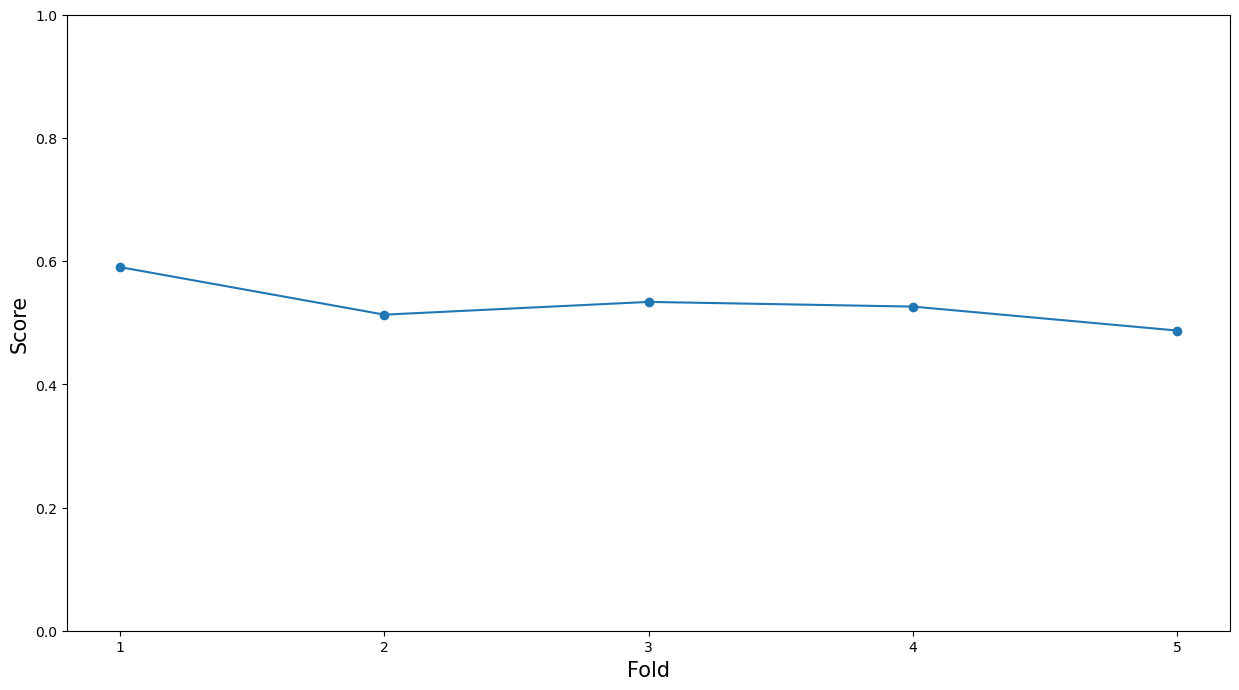

In [44]:
plt.plot(range(1, 6), cv_scores[0], marker='o')
plt.ylim(0, 1)
plt.ylabel('Score', fontsize=15)
plt.xlabel('Fold', fontsize=15)
plt.xticks(range(1,6))

print(np.round(cv_scores[0],2))
print('Average accuracy:', cv_scores[0].mean())
print('Accuracy standard deviation:', cv_scores[0].std());  

In [45]:
gs = GridSearchCV(estimator = KNeighborsRegressor(),
                  param_grid = {"n_neighbors": range(1,51),
                                "weights": ['uniform', 'distance'],
                                "p": [1,2]},
                  cv=KF)

gs.fit(X_train, y_train)

gs.cv_results_

{'mean_fit_time': array([0.00102978, 0.00093207, 0.00092478, 0.00092239, 0.00092425,
        0.00093741, 0.00093441, 0.00094213, 0.00093646, 0.00093436,
        0.00093026, 0.00088844, 0.0008811 , 0.00087299, 0.00087252,
        0.0008842 , 0.00087996, 0.00087519, 0.00087914, 0.00088673,
        0.00088081, 0.00087867, 0.00088434, 0.00088425, 0.00087337,
        0.000876  , 0.00087857, 0.00087919, 0.00087504, 0.00088305,
        0.00088596, 0.00088401, 0.00088463, 0.00088396, 0.00088224,
        0.00088339, 0.00088506, 0.00088449, 0.00088277, 0.00087886,
        0.00088301, 0.00088558, 0.00088711, 0.00088696, 0.00088997,
        0.00088062, 0.00088387, 0.00089054, 0.00089102, 0.00089483,
        0.00088005, 0.00088663, 0.00089536, 0.00089493, 0.00088272,
        0.00088754, 0.00088916, 0.00089445, 0.00088544, 0.0008882 ,
        0.00087967, 0.00088325, 0.00089097, 0.00089488, 0.00089025,
        0.00088711, 0.00089402, 0.00089321, 0.00088482, 0.00089221,
        0.00089498, 0.00088606,

In [46]:
gs.best_params_

{'n_neighbors': 15, 'p': 2, 'weights': 'distance'}

In [47]:
y_pred = gs.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

2.204230754024209

In [48]:
# Building KNN using the best params that we got from GridSearchCV

In [49]:
knn_gs = KNeighborsRegressor(n_neighbors= 15, p=2, weights='distance')
knn_gs.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15, weights='distance')

In [50]:
mse_train = mean_squared_error(y_train, knn_gs.predict(X_train))
mse_test = mean_squared_error(y_test, knn_gs.predict(X_test))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")

RMSE on the training data: 0.0

RMSE on the test data: 2.204230754024209


In [51]:
# On the training data, we dont have any error but on the test data its 2.204 rmse which means the model is highly overfitting.

In [52]:
knn_gs.predict(X_train)[:10]

array([[ 9.],
       [12.],
       [10.],
       [15.],
       [ 6.],
       [12.],
       [ 8.],
       [ 6.],
       [ 9.],
       [ 6.]])

In [53]:
y_train.head(10)

,Rings
3823,9
3956,12
3623,10
0,15
2183,6
4091,12
2042,8
1075,6
247,9
1461,6


### Summary

- After loading the dataset, we have done the data preprocessing to check the nature of the variables.
- Our goal is to predict the number of rings df["Rings"] (target variable) using the features given.
- We have built a KNNRegressor with some random n_neighbors and then checked the score. 
- After we found the perfect k value and built the model to get the minimum error possible.
- We have used RMSE and MAE as the metrics.
- We used the GridSearchCv to get the optimal K value and again we built the model, here we got the training error as o and test error as 2.204, indicating a overfitting in the model.